Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below.

Rename this problem sheet as follows:

    ps{number of lab}_{your user name}_problem{number of problem sheet in this lab}
    
for example
    
    ps8_blja_problem1

Submit your homework until Thursday, December 17, 2020, 9 am.

In [1]:
NAME = "Ahmad Modabber"
EMAIL = "amod@tu-chemnitz.de"
USERNAME = "amod"

---

# Introduction to Data Science
## Lab 8: Linear discriminant analysis (LDA) and Logistic Regression for the classification of iris types

The flower petal data set consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal size.

Given the predictors
- 1st column: sepal length,
- 2nd column: sepal width,
- 3rd column: petal length and
- 4th column: petal width,

our goal is to predict the correct class (0-Setosa, 1-Versicolour or 2-Virginica).

The data set is part of `scikit-learn`'s datasets module and can be imported with the following commands:

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

The data comes as a dictionary. You can access the predictors using `iris.data` and the classes using `iris.target`.

**Task (1 point)**: Store the predictors in a variable `X` and the response in a variable `y`.

In [3]:
# YOUR CODE HERE
X=iris.data
y=iris.target

In [4]:
assert X.shape == (150,4)
assert y.shape == (150,)

**Task (2 points)**: Plot the sepal length on the x-axis and the sepal width on the y-axis. Color each of the three types of irises differently.
Add a legend that gives the correct iris type (0-Setosa, 1-Versicolour, 2-Virginica)

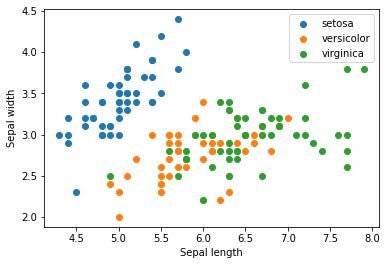

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# YOUR CODE HERE
import numpy as np
fig, ax = plt.subplots()

for i in range(3):
    t = np.where(y == i)
    plt.scatter(X[t, 0], X[t, 1], label=iris.target_names[i])

plt.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width');

**Task (2 points)**:
Split your data into a training and a test set.
Put the first 40 samples within each class in the training set and the remaining samples in a test data set.

Store the training set in variables `Xtrain` and `ytrain`, and the test set in variables `Xtest` and `ytest`, resp.

In [6]:
import numpy as np


Xtrain = np.concatenate((X[:40,:], X[50:90,:],X[100:140,:]))  #, axis=0 by default
ytrain = np.concatenate((y[:40],y[50:90],y[100:140])) 

Xtest = np.concatenate((X[40:50,:], X[90:100,:],X[140:,:])) 
ytest = np.concatenate((y[40:50],y[90:100],y[140:]))

In [7]:
assert Xtrain.shape == (120,4)
assert Xtest.shape == (30,4)
assert ytrain.shape == (120,)
assert ytest.shape == (30,)
assert abs(Xtrain.mean() - 3.485208333333333) < 1e-10
assert abs(ytrain.mean() - 1) < 1e-10
assert abs(ytest.mean() - 1) < 1e-10
assert abs(Xtest.mean() - 3.3816666666666673) < 1e-10

### Part B: Linear discriminant analysis

In the lecture you've heard about the classification method called
*Linear discriminant analysis (LDA)*.

**Task (1 points)**: Find a way using `scikit-learn` to accomplish a linear discriminant analysis on the **training data set**.

Perform an LDA using only the first two predictors, i.e., `sepal length` and `sepal width`.
Store your trained model in the variable `lda`.

In [8]:
# YOUR CODE HERE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(Xtrain[:, :2], ytrain);

lda.predict_proba([[2.1,1.1]])

array([[7.86742228e-01, 2.13224580e-01, 3.31914518e-05]])

In [9]:
assert 'lda' in locals()
assert abs(lda.predict_proba([[2.1,1.1]])[0][0] - 0.7867422283434491) < 1e-10

**Task (1 point)**: What is the proportion of correctly classified irises in the **test data set**? Store your answer in the variable `prop1`.

In [10]:
# YOUR CODE HERE
prop1=lda.score(Xtest[:, :2], ytest)  #OR (lda.predict(Xtest[:, :2])==ytest).sum()/len(ytest)
prop1

0.8666666666666667

In [11]:
assert 'prop1' in locals()

**Task (2 points)**: Now, incorporate all of the predictors and perform a second linear discriminant analysis using **only the training data**.
How does the proportion of correct classifications change (for the **test data**)?
Store the proportion of correct classifications for the test set in the variable `prop2`.

In [12]:
# YOUR CODE HERE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda2 = LinearDiscriminantAnalysis()
lda2.fit(Xtrain, ytrain)
prop2=lda2.score(Xtest, ytest)
prop2

1.0

In [13]:
assert 'prop2' in locals()

### Part C: Multi-class logistic regression

Here, we want to apply logistic regression in a multi-class setting.

#### One vs. rest approach
One way to extend the logistic regression to a setting with $k$ classes is by training not one but $k$ models for $k > 2$, one for each individual class.
As the name suggests, we train one model for each individual class $i$ and try to fit a logistic regression model to a modified data set, where the responses of members belonging to class $i$ are set to `True` and **all** others are set to `False`, i.e. we keep class $i$, set their responses to `True` and modify the responses of the remaining data and set those to `False`.

Fortunately, this **one vs. rest** approach is implemented for many models, and we can train it using the functions which have been already used for the *simple logistic regression* problem.

**Task (1 point)**: Train a logistic regression model (on our **training data**) with the following parameters: 
- penalty parameter: `C = 1e10` 
- solver: `solver = 'liblinear'`
- multi-class option active: `multi_class`

Store your model in the variable `lr`.

In [14]:
from sklearn.linear_model import LogisticRegression
# YOUR CODE HERE
lr=LogisticRegression(C = 1e10, solver = 'liblinear', multi_class='ovr')
lr.fit(Xtrain,ytrain);
lr.predict_proba([[2.1,1.1,1.1,1.0]])

array([[7.82353803e-02, 9.21764620e-01, 5.49745318e-12]])

In [15]:
assert 'lr' in locals()
assert abs(lr.predict_proba([[2.1,1.1,1.1,1.0]])[0][0] - 0.07823538026445785) < 1e-6

**Task (1 point)**: Store the proportion of correct classifications for the **test set** in the variable `prop0`.

In [16]:
# YOUR CODE HERE
prop0 = lr.score(Xtest, ytest)
prop0

1.0

In [17]:
assert 'prop0' in locals()